In [53]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re


In [54]:
file = open("doc1.txt","r+",encoding="utf8") 
paragraph = file.read()

In [55]:
paragraph

'Of course, in one sense, the first essential for a man’s being a good citizen is his possession of the home virtues of which we think when we call a man by the emphatic adjective of manly. No man can be a good citizen who is not a good husband and a good father, who is not honest in his dealings with other men and women, faithful to his friends and fearless in the presence of his foes, who has not got a sound heart, a sound mind, and a sound body; exactly as no amount of attention to civil duties will save a nation if the domestic life is undermined, or there is lack of the rude military virtues which alone can assure a country’s position in the world. In a free republic the ideal citizen must be one willing and able to take arms for the defense of the flag, exactly as the ideal citizen must be the father of many healthy children. A race must be strong and vigorous; it must be a race of good fighters and good breeders, else its wisdom will come to naught and its virtue be ineffective;

In [56]:
text = re.sub(r'\[^A-Za-z0-9]+',' ',paragraph)
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [57]:
sentences = nltk.sent_tokenize(text)
sentences

['of course, in one sense, the first essential for a man’s being a good citizen is his possession of the home virtues of which we think when we call a man by the emphatic adjective of manly.',
 'no man can be a good citizen who is not a good husband and a good father, who is not honest in his dealings with other men and women, faithful to his friends and fearless in the presence of his foes, who has not got a sound heart, a sound mind, and a sound body; exactly as no amount of attention to civil duties will save a nation if the domestic life is undermined, or there is lack of the rude military virtues which alone can assure a country’s position in the world.',
 'in a free republic the ideal citizen must be one willing and able to take arms for the defense of the flag, exactly as the ideal citizen must be the father of many healthy children.',
 'a race must be strong and vigorous; it must be a race of good fighters and good breeders, else its wisdom will come to naught and its virtue be

In [58]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [59]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [60]:
sent_word

[['course',
  ',',
  'one',
  'sense',
  ',',
  'first',
  'essential',
  'man',
  '’',
  'good',
  'citizen',
  'possession',
  'home',
  'virtues',
  'think',
  'call',
  'man',
  'emphatic',
  'adjective',
  'manly',
  '.'],
 ['man',
  'good',
  'citizen',
  'good',
  'husband',
  'good',
  'father',
  ',',
  'honest',
  'dealings',
  'men',
  'women',
  ',',
  'faithful',
  'friends',
  'fearless',
  'presence',
  'foes',
  ',',
  'got',
  'sound',
  'heart',
  ',',
  'sound',
  'mind',
  ',',
  'sound',
  'body',
  ';',
  'exactly',
  'amount',
  'attention',
  'civil',
  'duties',
  'save',
  'nation',
  'domestic',
  'life',
  'undermined',
  ',',
  'lack',
  'rude',
  'military',
  'virtues',
  'alone',
  'assure',
  'country',
  '’',
  'position',
  'world',
  '.'],
 ['free',
  'republic',
  'ideal',
  'citizen',
  'must',
  'one',
  'willing',
  'able',
  'take',
  'arms',
  'defense',
  'flag',
  ',',
  'exactly',
  'ideal',
  'citizen',
  'must',
  'father',
  'many',
  'he

In [61]:
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [62]:
vector = model.wv['freedom']

print(vector)

[ 2.3751392e-03 -3.3394477e-05  3.4715224e-03  4.2879772e-03
 -2.7155662e-03  3.1784438e-03 -3.4933414e-03 -4.6688458e-03
  3.5903458e-03 -1.3460631e-03  4.1124662e-03  2.0029233e-03
  1.8501348e-03  7.2153634e-04  3.4283721e-03  8.8170893e-04
  6.4390386e-04 -6.4191630e-04 -2.4238317e-03  4.6725795e-03
  8.2471373e-04 -3.3098585e-03  9.5932907e-04 -1.8524871e-03
  4.0657069e-03 -2.1911825e-03 -4.1449727e-03  3.5931831e-03
  1.7384607e-03  2.1470350e-03  2.7269886e-03 -2.5240018e-03
  5.9880590e-04  8.0588902e-04  2.4423322e-03 -4.9262298e-03
  2.8832215e-03 -4.3973685e-03  1.3138019e-03 -4.1888431e-03
  1.1461891e-03  1.4478172e-03 -1.9453571e-03  1.3096048e-03
  2.8321357e-03 -1.0804961e-03 -2.2438539e-03 -3.3899769e-03
 -2.4051089e-03 -2.5849761e-03 -1.9357946e-03 -6.1603532e-05
 -1.2135322e-03 -4.1455687e-03 -3.9579505e-03  1.4162029e-04
  2.4467597e-03 -2.7512617e-03 -2.4438514e-03 -8.5938338e-04
 -4.6193446e-03  3.1157157e-03 -2.2272728e-04  2.1622221e-03
 -9.3975221e-04 -1.95369

In [65]:
similar = model.wv.most_similar('people',topn=20)

similar

[('subject', 0.3102765381336212),
 ('endeavor', 0.28038954734802246),
 ('fruitful', 0.2650531828403473),
 ('team', 0.26460328698158264),
 ('duty', 0.254751980304718),
 ('native', 0.24036961793899536),
 ('virtues', 0.2296910285949707),
 ('best', 0.22819706797599792),
 ('rescue', 0.22770604491233826),
 ('plea', 0.2263665497303009),
 ('means', 0.2259097546339035),
 ('give', 0.22331920266151428),
 ('atone', 0.21704162657260895),
 ('mighty', 0.2152194231748581),
 ('men', 0.21346452832221985),
 ('guarded', 0.2125781774520874),
 ('undermined', 0.202626034617424),
 ('tell', 0.19946405291557312),
 ('striving', 0.1991012990474701),
 ('long', 0.1976996511220932)]

C:\Users\Silent night\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


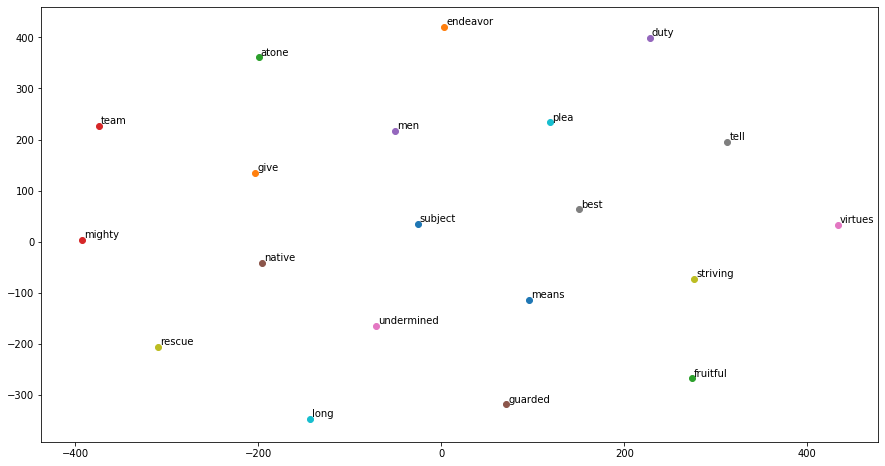

In [69]:
from sklearn.manifold import  TSNE
vocab = ['subject','endeavor','fruitful','team','duty','native','virtues','best','rescue','plea','means','give','atone','mighty','men','guarded','undermined','tell','striving','long']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)